In [1]:
%load_ext autoreload
%autoreload 2

from utility import format_plt, symmetric_stable_scaling_factor, plot_gnvm_residuals, save_fig, plot_gnvm_process_1d

format_plt()


In [36]:
from stonesoup.types.groundtruth import GroundTruthPath, GroundTruthState
from stonesoup.models.transition.driver import AlphaStableNSMDriver
from stonesoup.models.transition.driven import EquilibriumRevertingVelocity
from datetime import datetime, timedelta
import numpy as np

from stonesoup.models.transition.base import CombinedLinearDrivenTransitionModel

# And the clock starts
start_time = datetime.now().replace(microsecond=0)
seed = 1003

mu_W = 0.
sigma_W2 = 1
noise_case=2
c=10
theta=0.8
eta = 1
rho_x = 10
rho_y = -50
alpha=1.4

as_driver1 = AlphaStableNSMDriver(mu_W=mu_W, sigma_W2=sigma_W2, seed=seed, c=c, alpha=alpha, noise_case=noise_case)
as_driver2 = as_driver1
erv_x = EquilibriumRevertingVelocity(cg_driver=as_driver1, theta=theta, eta=eta, rho=rho_x)
erv_y = EquilibriumRevertingVelocity(cg_driver=as_driver2, theta=theta, eta=eta, rho=rho_y)
transition_model = CombinedLinearDrivenTransitionModel([erv_x, erv_y])


timesteps = [start_time]
truth = GroundTruthPath([GroundTruthState([0, 1, 0, 1], timestamp=timesteps[0])])

num_steps = 75
for k in range(1, num_steps + 1):
    timesteps.append(start_time+timedelta(seconds=k))  # add next timestep to list of timesteps
    truth.append(GroundTruthState(
        transition_model.function(truth[k-1], noise=True, time_interval=timedelta(seconds=1)),
        timestamp=timesteps[k]))

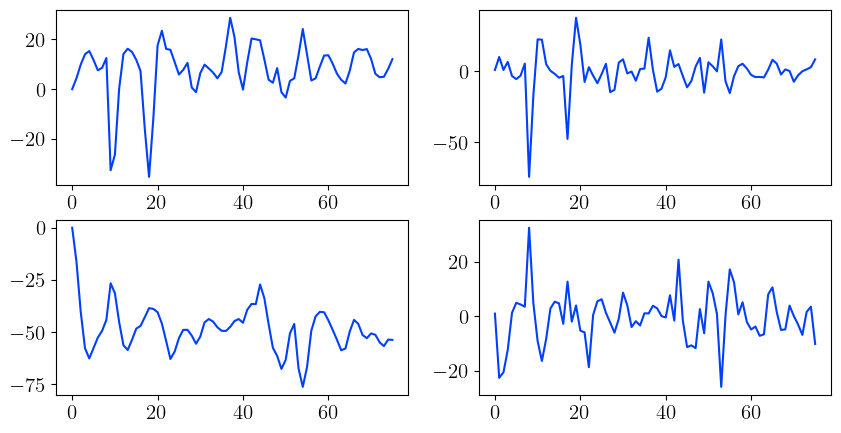

In [37]:
import matplotlib.pyplot as plt


t = np.array([(data.timestamp - start_time).total_seconds() for data in truth])
t -= t[0]

y0 = np.array([data.state_vector[0] for data in truth])
y1 = np.array([data.state_vector[1] for data in truth])
y2 = np.array([data.state_vector[2] for data in truth])
y3 = np.array([data.state_vector[3] for data in truth])

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

axs[0][0].plot(t, y0)
axs[0][1].plot(t, y1)
axs[1][0].plot(t, y2)
axs[1][1].plot(t, y3)


In [38]:
from stonesoup.plotter import Plotterly
import plotly.graph_objects as go

plotter_static = Plotterly(autosize=False,
    width=750,
    height=500,)
# plotter_static.plot_ground_truths(truth, [0, 2])
# marker=dict(
#             color='LightSkyBlue',
#             size=120,
#             line=dict(
#                 color='MediumPurple',
#                 width=12
#             )
#         )
plotter_static.plot_ground_truths(truth, [0, 2], marker = {'color' : 'black', 'size':20, 'symbol':'circle'})
fig = plotter_static.fig


In [39]:
start_point = truth[0].state_vector[[0, 2]]
end_point = truth[-1].state_vector[[0, 2]]
markers = list(zip(start_point, end_point))
markers

[(0, 12.024219067131135), (0, -53.69095810823558)]

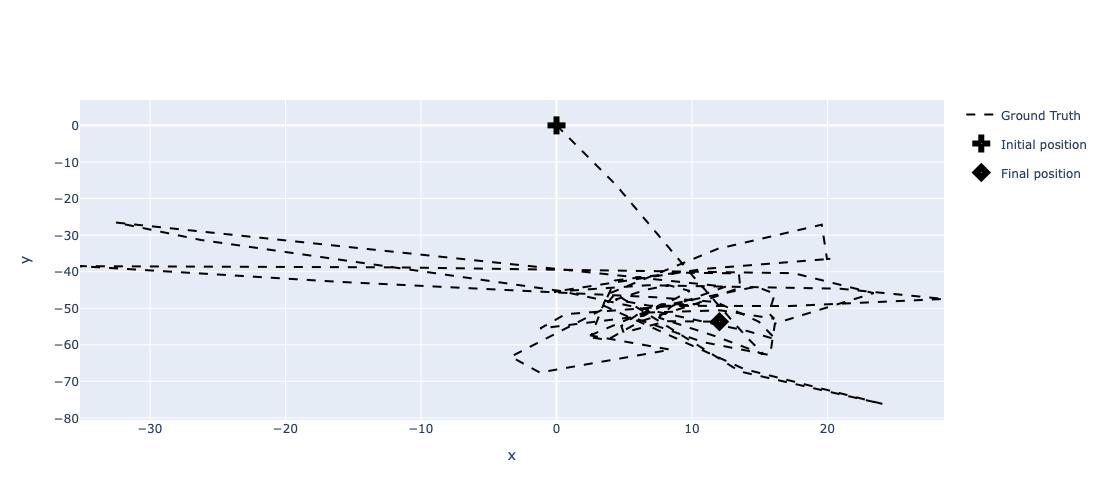

In [40]:
fig.add_trace(go.Scatter(x=[start_point[0]], y=[start_point[1]],
                    mode='markers',
                    name='Initial position',
                    marker = {'color' : 'black', 'size':15, 'symbol':'cross-dot'}))
fig.add_trace(go.Scatter(x=[end_point[0]], y=[end_point[1]],
                    mode='markers',
                    name='Final position',
                    marker = {'color' : 'black', 'size':15, 'symbol':'diamond-dot'}))


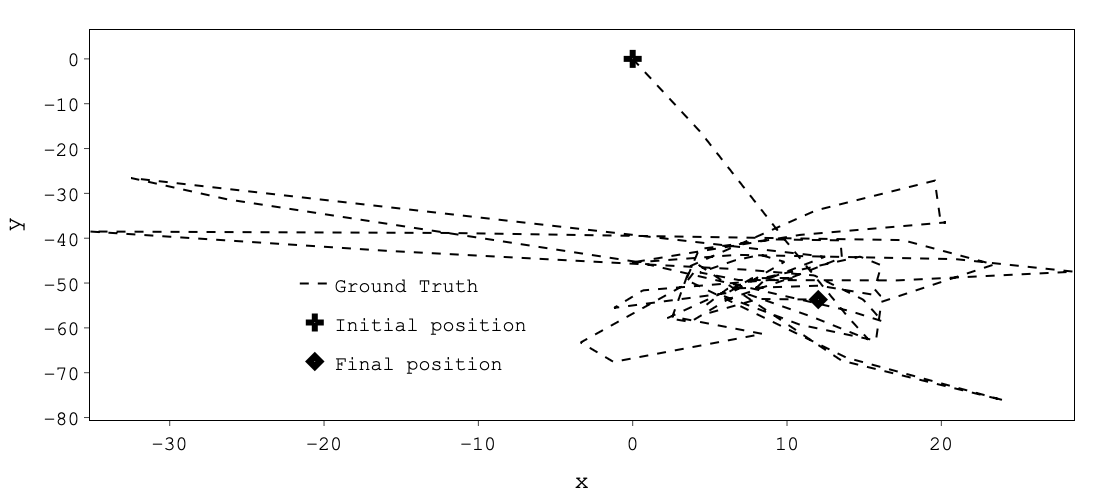

In [41]:
fig.update_layout(
    margin = {'l':30,'t':30,'b':30, 'r': 30},
    # showlegend=False,
    plot_bgcolor='white',
    # font_family="Serif", 
    # font_color='black',
      # font_size=12,
    legend=dict(
        yanchor="bottom",
        y=0.1,
        xanchor="right",
        x=0.45
    ),
    font=dict(
        family="Courier New, monospace",
        size=20,  # Set the font size here
        color="black"
    ),
)
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    # gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    # gridcolor='lightgrey'
)

In [43]:
fig.write_image(f"./assets/as_erv.pdf")